In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset_original/ratio_marriage.csv")
df['Hometown'] = df['Hometown'].str.upper()
df.head()

,Timestamp,Name,Gender,Age,Hometown,State,lat,long,Educational Qualification,Have you completed your graduation?,...,"Do you plan on getting married before, after or during graduation?",If planning on getting married is it love or arranged,Is there family pressure on you to get married?,Do you think marriage disrupts with studies,Why do you think people marry early?,Are you and spouse financially independent,What is the age difference between you and your spouse?,Are your In-Laws pressuring you into having children?,Do you think both spouses being college graduates can lead to a more healthy marriage?,What are your views on child marriage?
0,2022/09/13 12:10:15 AM GMT+5:30,Dhruv Agarwal,Male,19,AGRA,UTTAR PRADESH,27.1800,78.0200,Undergraduation,No,...,After,Arranged marriage,No,No,NaN,Not married yet,NaN,Not married,Maybe,NaN
1,2022/09/13 7:48:23 PM GMT+5:30,V s Krishna,Female,19,ALAPPUZHA,KERALA,9.4981,76.3388,Degree,No,...,After,Love marriage,No,Yes,I think Its not right,Not married yet,Not married,Not married,Maybe,I don't know
2,2022/09/13 9:08:20 PM GMT+5:30,Deepthi Sebastian,Female,19,ALAPPUZHA,KERALA,9.4981,76.3388,2,No,...,After,Arranged marriage,No,Yes,NaN,Not married yet,NaN,NaN,NaN,NaN
3,2022/09/13 12:30:24 AM GMT+5:30,Vanshika Singh,Female,20,BALLIA,UTTAR PRADESH,25.8307,84.1857,Undergraduate,No,...,After,Arranged marriage,No,Yes,"Could be a lot of reasons, but mainly due to f...",Not married yet,NaN,Not married,Maybe,"It's stupid, illogical, and completely wrong"
4,2022/09/13 2:30:32 PM GMT+5:30,Ramesh kumar jha,Male,44,BETTIAH,UTTAR PRADESH,26.8026,84.5201,BA,Yes,...,Already married,Arranged marriage,No,No,NaN,Yes,5,No,No,NaN


In [ ]:
df_home = df[['Name', 'Hometown','lat','long','State']]
df_home

,Name,Hometown,lat,long,State
0,Dhruv Agarwal,AGRA,27.1800,78.0200,UTTAR PRADESH
1,V s Krishna,ALAPPUZHA,9.4981,76.3388,KERALA
2,Deepthi Sebastian,ALAPPUZHA,9.4981,76.3388,KERALA
3,Vanshika Singh,BALLIA,25.8307,84.1857,UTTAR PRADESH
4,Ramesh kumar jha,BETTIAH,26.8026,84.5201,UTTAR PRADESH
...,...,...,...,...,...
101,Surabhi,THRISSUR,10.5276,76.2144,KERALA
102,Harmish soni,UDAIPUR,24.5833,73.6833,RAJASTHAN
103,Pradyumn Thakur,VAISHALI,25.6838,85.3550,BIHAR
104,Rabnish Kashyap,VAISHALI,25.6838,85.3550,BIHAR


In [ ]:
state_df = df_home["State"].value_counts()   # This gives the number of landslides that took place in every state over the years
state_df = state_df.to_frame()
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State', 'Count']                    # Renaming the columns 

In [ ]:
state_df.rename(columns = {'State':'State_Name'}, inplace = True)

In [ ]:
state_df

,State_Name,Count
0,BIHAR,38
1,DELHI,20
2,KERALA,15
3,UTTAR PRADESH,11
4,MADHYA PRADESH,7
5,JHARKHAND,5
6,UTTARAKHAND,4
7,HARYANA,1
8,HIMACHAL PRADESH,1
9,WEST BENGAL,1


In [ ]:
lat = df_home['lat'].unique().tolist()     
long = df_home['long'].unique().tolist()

In [ ]:
geometry = [Point(xy) for xy in zip(long,lat)]
geometry

[<POINT (78.02 27.18)>,
 <POINT (76.339 9.498)>,
 <POINT (84.186 25.831)>,
 <POINT (84.52 26.803)>,
 <POINT (77.417 23.25)>,
 <POINT (84.754 25.781)>,
 <POINT (84.872 24.206)>,
 <POINT (78.029 30.318)>,
 <POINT (75.646 29.238)>,
 <POINT (76.558 9.671)>,
 <POINT (85.017 24.75)>,
 <POINT (81.962 27.134)>,
 <POINT (84.437 26.483)>,
 <POINT (76.521 31.686)>,
 <POINT (75.847 22.721)>,
 <POINT (80.332 26.45)>,
 <POINT (88.338 22.541)>,
 <POINT (76.522 9.592)>,
 <POINT (76.526 9.679)>,
 <POINT (83.887 26.74)>,
 <POINT (80.947 26.847)>,
 <POINT (76.747 9.702)>,
 <POINT (77.683 27.483)>,
 <POINT (85.383 26.12)>,
 <POINT (79.454 29.392)>,
 <POINT (85.544 24.887)>,
 <POINT (77.2 28.7)>,
 <POINT (76.655 10.787)>,
 <POINT (85.141 25.61)>,
 <POINT (75.609 28.38)>,
 <POINT (85.512 23.636)>,
 <POINT (85.335 23.356)>,
 <POINT (81.304 24.536)>,
 <POINT (79.544 22.087)>,
 <POINT (81.357 23.3)>,
 <POINT (84.36 26.224)>,
 <POINT (72.963 19.18)>,
 <POINT (76.9 8.5)>,
 <POINT (76.214 10.528)>,
 <POINT (73.68

In [ ]:
fp = "drive/MyDrive/Colab Notebooks/Indianstate/India_State_Boundary.shp"
map_df = gpd.read_file(fp)
map_df.head()

,State_Name,geometry
0,Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,Haryana,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


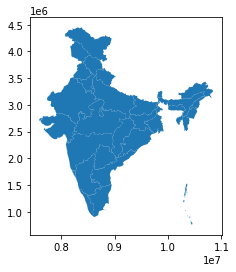

In [ ]:
map_df = map_df[['State_Name', 'geometry']]
map_df.plot()

In [ ]:
map_df['State_Name'] = map_df['State_Name'].str.upper()
map_df.head()

,State_Name,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,DAMAN AND DIU AND DADRA AND NAGAR HAVELI,"MULTIPOLYGON (((8122247.822 2312434.407, 81223..."
3,DELHI,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
4,HARYANA,"POLYGON ((8524318.539 3516490.865, 8524451.392..."


In [ ]:
#Merging the data
merged = map_df.set_index('State_Name').join(state_df.set_index('State_Name'))
merged['Count'] = merged['Count'].replace(np.nan, 0)
merged.head()

,geometry,Count
State_Name,,
ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",0.0
ANDHRA PRADESH,"POLYGON ((9426056.496 2174632.352, 9426228.484...",0.0
ARUNACHAL PRADESH,"POLYGON ((10696175.277 3434232.650, 10696981.8...",0.0
ASSAM,"POLYGON ((10380499.251 2872443.723, 10380499.2...",0.0
BIHAR,"POLYGON ((9362949.333 3188807.607, 9362966.106...",38.0


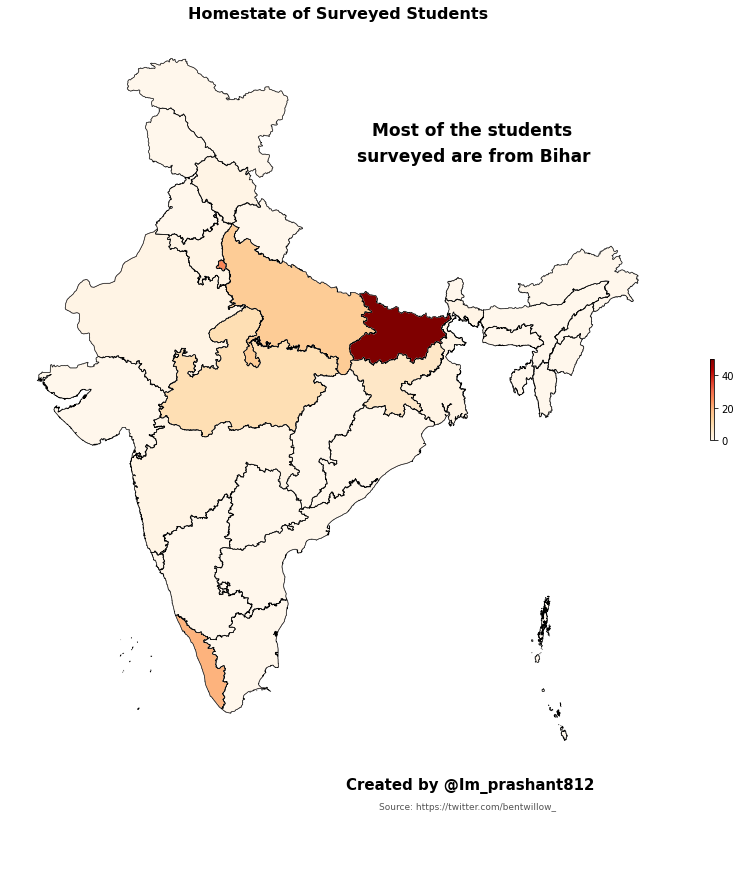

In [ ]:
import math
fig = plt.figure(1, figsize=(15,15)) 
ax = fig.add_subplot()

merged.boundary.plot(ax=ax, color='Black', linewidth=0.5)
merged.plot(ax=ax, cmap='OrRd', figsize=(12, 12))


ax.axis('off')
ax.set_title('Homestate of Surveyed Students', fontdict={'fontsize': '16', 'fontweight' : 'bold','fontname':'Helvetica'})
ax.annotate('Source: https://twitter.com/bentwillow_',xy=(0.51, 0.08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
ax.annotate('Created by @Im_prashant812',xy=(0.8, 0.1),  xycoords='figure fraction', horizontalalignment='right', verticalalignment='center', fontsize=15, color='Black',fontweight = 'bold',fontname='Helvetica')
ax.annotate('Most of the students',xy=(0.5, 0.86),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=17, color='Black',fontweight = 'bold',fontname='Helvetica')
ax.annotate('surveyed are from Bihar',xy=(0.48, 0.83),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=17, color='Black',fontweight = 'bold',fontname='Helvetica')

merged.plot(column=merged.Count, cmap='OrRd', linewidth=0.9, ax=ax, edgecolor='0.6', legend=False)
plt.rcParams.update({'font.sans-serif':'Helvetica'})

vmin, vmax = 0, 50
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm,fraction = 0.16,shrink = 0.1)

In [ ]:
df_arr_lov = df[['Name', 'Hometown','lat','long','State','If planning on getting married is it love or arranged']]
df_arr_lov

,Name,Hometown,lat,long,State,If planning on getting married is it love or arranged
0,Dhruv Agarwal,AGRA,27.1800,78.0200,UTTAR PRADESH,Arranged marriage
1,V s Krishna,ALAPPUZHA,9.4981,76.3388,KERALA,Love marriage
2,Deepthi Sebastian,ALAPPUZHA,9.4981,76.3388,KERALA,Arranged marriage
3,Vanshika Singh,BALLIA,25.8307,84.1857,UTTAR PRADESH,Arranged marriage
4,Ramesh kumar jha,BETTIAH,26.8026,84.5201,UTTAR PRADESH,Arranged marriage
...,...,...,...,...,...,...
101,Surabhi,THRISSUR,10.5276,76.2144,KERALA,Love marriage
102,Harmish soni,UDAIPUR,24.5833,73.6833,RAJASTHAN,Love marriage
103,Pradyumn Thakur,VAISHALI,25.6838,85.3550,BIHAR,Love marriage
104,Rabnish Kashyap,VAISHALI,25.6838,85.3550,BIHAR,Love marriage


In [ ]:
df_arr_lov_dc = df_arr_lov["If planning on getting married is it love or arranged"].value_counts() 

In [ ]:
df_arr_lov_dc

Love marriage        54
Arranged marriage    39
Name: If planning on getting married is it love or arranged, dtype: int64